<a href="https://colab.research.google.com/github/HongKanokkarn/ML_CIFAR10/blob/main/css324f21_hw_ml_6222790147%266222790428.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSS324 Homework Assignment

CIFAR10 is a small image classification dataset. Its objective is to classification an 32x32 color image into 10 classes.

See https://www.cs.toronto.edu/~kriz/cifar.html and https://keras.io/api/datasets/cifar10/ for more details.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


7


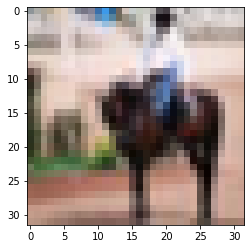

In [5]:
# Plot a training example
x = x_train[11, :, :, :]
y = y_train[11][0]

plt.imshow(x)
print(y)        # 7 = horse

## Question 1

Construct a deep neural network containing three hidden layer to classify images in the CIFAR10 dataset. You can choose the numbers of hidden nodes in three layers, appropriate activation functions, regularizers. Use 20% of the training set to validate the model.

After the training process, print the training, validation, and test accuracies, as well as plot the training loss and validation loss.

In [1]:
# Your implementation for Question 1
#how this work

In [ ]:
# Plot the training loss and validation loss

## Question 2

Construct a convolutional neural network using your own structure. Try to maximize the prediction accuracy of your model.

After the training process, print the training, validation, and test accuracies, as well as plot the training loss and validation loss.

In [ ]:
# Your implementation for Question 2

In [ ]:
# Plot the training loss and validation loss